In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import itertools

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('feature_engineered.csv', index_col='Unnamed: 0')
data.head()

,gameid,date,playerid_Bluebot,playerid_Bluejng,playerid_Bluemid,playerid_Bluesup,playerid_Bluetop,playerid_Redbot,playerid_Redjng,playerid_Redmid,playerid_Redsup,playerid_Redtop,max_score_Bluebot,max_score_Bluejng,max_score_Bluemid,max_score_Bluesup,max_score_Bluetop,max_score_Redbot,max_score_Redjng,max_score_Redmid,max_score_Redsup,max_score_Redtop,average_killsat15_Bluetop,average_deathsat15_Bluetop,average_assistsat15_Bluetop,average_cs_Bluetop,average_score_Bluetop,average_firstbloodkill_Bluetop,average_triplekills_Bluetop,average_quadrakills_Bluetop,average_pentakills_Bluetop,average_gamelength_Bluetop,average_visionscore_Bluetop,total_games_Bluetop,score_Bluetop,average_killsat15_Bluejng,average_deathsat15_Bluejng,average_assistsat15_Bluejng,average_cs_Bluejng,average_score_Bluejng,average_firstbloodkill_Bluejng,average_triplekills_Bluejng,average_quadrakills_Bluejng,average_pentakills_Bluejng,average_gamelength_Bluejng,average_visionscore_Bluejng,total_games_Bluejng,score_Bluejng,average_killsat15_Bluemid,average_deathsat15_Bluemid,average_assistsat15_Bluemid,average_cs_Bluemid,average_score_Bluemid,average_firstbloodkill_Bluemid,average_triplekills_Bluemid,average_quadrakills_Bluemid,average_pentakills_Bluemid,average_gamelength_Bluemid,average_visionscore_Bluemid,total_games_Bluemid,score_Bluemid,average_killsat15_Bluebot,average_deathsat15_Bluebot,average_assistsat15_Bluebot,average_cs_Bluebot,average_score_Bluebot,average_firstbloodkill_Bluebot,average_triplekills_Bluebot,average_quadrakills_Bluebot,average_pentakills_Bluebot,average_gamelength_Bluebot,average_visionscore_Bluebot,total_games_Bluebot,score_Bluebot,average_killsat15_Bluesup,average_deathsat15_Bluesup,average_assistsat15_Bluesup,average_cs_Bluesup,average_score_Bluesup,average_firstbloodkill_Bluesup,average_triplekills_Bluesup,average_quadrakills_Bluesup,average_pentakills_Bluesup,average_gamelength_Bluesup,average_visionscore_Bluesup,total_games_Bluesup,score_Bluesup,average_killsat15_Redtop,average_deathsat15_Redtop,average_assistsat15_Redtop,average_cs_Redtop,average_score_Redtop,average_firstbloodkill_Redtop,average_triplekills_Redtop,average_quadrakills_Redtop,average_pentakills_Redtop,average_gamelength_Redtop,average_visionscore_Redtop,total_games_Redtop,score_Redtop,average_killsat15_Redjng,average_deathsat15_Redjng,average_assistsat15_Redjng,average_cs_Redjng,average_score_Redjng,average_firstbloodkill_Redjng,average_triplekills_Redjng,average_quadrakills_Redjng,average_pentakills_Redjng,average_gamelength_Redjng,average_visionscore_Redjng,total_games_Redjng,score_Redjng,average_killsat15_Redmid,average_deathsat15_Redmid,average_assistsat15_Redmid,average_cs_Redmid,average_score_Redmid,average_firstbloodkill_Redmid,average_triplekills_Redmid,average_quadrakills_Redmid,average_pentakills_Redmid,average_gamelength_Redmid,average_visionscore_Redmid,total_games_Redmid,score_Redmid,average_killsat15_Redbot,average_deathsat15_Redbot,average_assistsat15_Redbot,average_cs_Redbot,average_score_Redbot,average_firstbloodkill_Redbot,average_triplekills_Redbot,average_quadrakills_Redbot,average_pentakills_Redbot,average_gamelength_Redbot,average_visionscore_Redbot,total_games_Redbot,score_Redbot,average_killsat15_Redsup,average_deathsat15_Redsup,average_assistsat15_Redsup,average_cs_Redsup,average_score_Redsup,average_firstbloodkill_Redsup,average_triplekills_Redsup,average_quadrakills_Redsup,average_pentakills_Redsup,average_gamelength_Redsup,average_visionscore_Redsup,total_games_Redsup,score_Redsup
0,ESPORTSTMNT01/1031941,2019-01-19 09:53:50,oe:player:9573154ad8bc9459b4c0d940315054f,oe:player:62922f2b370657a966de4d84f5586bf,oe:player:fb6e61b8acb05df17b7e5ad4ae7c800,oe:player:e4e24b8656e4e6a74b939af730b0148,oe:player:b3dae530a02238b0628518ef886e505,oe:player:9405c3aff9112c3c60d03b94792877d,oe:player:b06f165ee2371a61d3be74d413e1e21,oe:player:942180f580887b12bcb04219e0dde84,oe:player:b0ec3df39d61f953e7af0afd8eb8c4a,oe:player:310e4ace014984819dd016f4bd7e76

In [3]:
def unstacker(df, position, side):
    
    if side == 'Blue':
        otherside = 'Red'
    else:
        otherside = 'Blue'
    
    drops = list(data.filter(regex=(f"^(playerid_{side}|score_{side}|max_score_{side})((?!{position}).)*$")).columns)
    drops += list(df.filter(regex=(f"^(playerid|score|max_score)_{otherside}.*")))
    print(len(drops))
    out = data.drop(columns=drops)
    
    own_names = list(out.filter(regex=("^(playerid|score|max_score).*")).columns)
    own_new_names = [x.replace(side+position,'own') for x in own_names]
    own_renamer = dict(zip(own_names, own_new_names))
    out.rename(columns=own_renamer, inplace=True)

    team_names = list(out.filter(regex=(f".*{side}")))
    team_new_names = [x.replace(side, 'team') for x in team_names]
    team_rename = dict(zip(team_names, team_new_names))
    out.rename(columns=team_rename, inplace=True)
    
    enemy_names = list(out.filter(regex=f".*{otherside}"))
    enemy_new_names = [x.replace(otherside, 'enemy') for x in enemy_names]
    enemy_rename = dict(zip(enemy_names, enemy_new_names))
    out.rename(columns=enemy_rename, inplace=True)
    
    out['position'] = position
    
    return out


    
    

In [4]:
pos = ['top', 'jng', 'mid', 'sup', 'bot']
sides = ['Blue', 'Red']
things = list(itertools.product(pos, sides))
result = pd.DataFrame()
for thing in things:
    print(thing)
    temp = unstacker(data, thing[0], thing[1])
    result = pd.concat([temp, result], axis=0)

    

('top', 'Blue')
27
('top', 'Red')
27
('jng', 'Blue')
27
('jng', 'Red')
27
('mid', 'Blue')
27
('mid', 'Red')
27
('sup', 'Blue')
27
('sup', 'Red')
27
('bot', 'Blue')
27
('bot', 'Red')
27


In [5]:
result.head()

,gameid,date,playerid_own,max_score_own,average_killsat15_enemytop,average_deathsat15_enemytop,average_assistsat15_enemytop,average_cs_enemytop,average_score_enemytop,average_firstbloodkill_enemytop,average_triplekills_enemytop,average_quadrakills_enemytop,average_pentakills_enemytop,average_gamelength_enemytop,average_visionscore_enemytop,total_games_enemytop,average_killsat15_enemyjng,average_deathsat15_enemyjng,average_assistsat15_enemyjng,average_cs_enemyjng,average_score_enemyjng,average_firstbloodkill_enemyjng,average_triplekills_enemyjng,average_quadrakills_enemyjng,average_pentakills_enemyjng,average_gamelength_enemyjng,average_visionscore_enemyjng,total_games_enemyjng,average_killsat15_enemymid,average_deathsat15_enemymid,average_assistsat15_enemymid,average_cs_enemymid,average_score_enemymid,average_firstbloodkill_enemymid,average_triplekills_enemymid,average_quadrakills_enemymid,average_pentakills_enemymid,average_gamelength_enemymid,average_visionscore_enemymid,total_games_enemymid,average_killsat15_enemybot,average_deathsat15_enemybot,average_assistsat15_enemybot,average_cs_enemybot,average_score_enemybot,average_firstbloodkill_enemybot,average_triplekills_enemybot,average_quadrakills_enemybot,average_pentakills_enemybot,average_gamelength_enemybot,average_visionscore_enemybot,total_games_enemybot,average_killsat15_enemysup,average_deathsat15_enemysup,average_assistsat15_enemysup,average_cs_enemysup,average_score_enemysup,average_firstbloodkill_enemysup,average_triplekills_enemysup,average_quadrakills_enemysup,average_pentakills_enemysup,average_gamelength_enemysup,average_visionscore_enemysup,total_games_enemysup,average_killsat15_teamtop,average_deathsat15_teamtop,average_assistsat15_teamtop,average_cs_teamtop,average_score_teamtop,average_firstbloodkill_teamtop,average_triplekills_teamtop,average_quadrakills_teamtop,average_pentakills_teamtop,average_gamelength_teamtop,average_visionscore_teamtop,total_games_teamtop,average_killsat15_teamjng,average_deathsat15_teamjng,average_assistsat15_teamjng,average_cs_teamjng,average_score_teamjng,average_firstbloodkill_teamjng,average_triplekills_teamjng,average_quadrakills_teamjng,average_pentakills_teamjng,average_gamelength_teamjng,average_visionscore_teamjng,total_games_teamjng,average_killsat15_teammid,average_deathsat15_teammid,average_assistsat15_teammid,average_cs_teammid,average_score_teammid,average_firstbloodkill_teammid,average_triplekills_teammid,average_quadrakills_teammid,average_pentakills_teammid,average_gamelength_teammid,average_visionscore_teammid,total_games_teammid,average_killsat15_teambot,average_deathsat15_teambot,average_assistsat15_teambot,average_cs_teambot,average_score_teambot,average_firstbloodkill_teambot,average_triplekills_teambot,average_quadrakills_teambot,average_pentakills_teambot,average_gamelength_teambot,average_visionscore_teambot,total_games_teambot,score_own,average_killsat15_teamsup,average_deathsat15_teamsup,average_assistsat15_teamsup,average_cs_teamsup,average_score_teamsup,average_firstbloodkill_teamsup,average_triplekills_teamsup,average_quadrakills_teamsup,average_pentakills_teamsup,average_gamelength_teamsup,average_visionscore_teamsup,total_games_teamsup,position
0,ESPORTSTMNT01/1031941,2019-01-19 09:53:50,oe:player:9405c3aff9112c3c60d03b94792877d,34.675,0.328125,0.390625,0.562500,324.125000,20.716875,0.031250,0.031250,0.000000,0.0,2147.140625,43.734375,64.0,0.687500,0.312500,0.968750,181.640625,21.554688,0.156250,0.000000,0.000000,0.0,2147.140625,68.250000,64.0,0.480000,0.280000,0.520000,358.580000,26.731600,0.040000,0.120000,0.020000,0.0,2183.540000,42.660000,50.0,0.250000,0.296875,0.578125,373.687500,25.520625,0.093750,0.062500,0.000000,0.000000,2147.140625,46.843750,64.0,0.275362,0.449275,0.884058,60.014493,16.953913,0.130435,0.0,0.0,0.0,2198.304348,83.202899,69.0,0.519231,0.615385,0.775641,297.775641,17.750385,0.102564,0.012821,0.00641,0.0,2179.794872,30.621795,156.0,0.763636,0.454545,0.963636,163.818182,15.858182,

In [14]:
result.score_own.head()

0     0.80
1    32.54
2    40.74
3    17.96
4    38.20
Name: score_own, dtype: float64

ValueError: cannot reindex from a duplicate axis

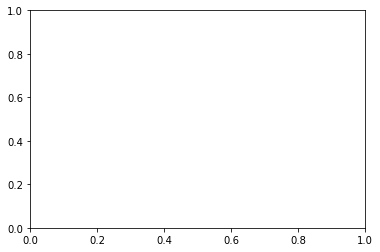

In [16]:
sns.histplot(data=result, x='score_own')

In [ ]:
result.to_csv('unstacked.csv')